In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset
df = pd.read_csv("reviews_data.csv")

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Display basic information about the dataset
print("Initial Dataset Info:")
print(df.info())

# Display first few rows
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   date         850 non-null    object 
 3   rating       705 non-null    float64
 4   review       850 non-null    object 
 5   image_links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB
None
       name           location                     date  rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              review  \
0  Amber and LaDonna 

In [8]:
# Check for missing values before cleaning
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())



Missing Values Before Cleaning:
name             0
location         0
date             0
rating         145
review           0
image_links      0
dtype: int64


In [10]:
# Handling missing values
df.dropna(subset=['rating'], inplace=True)  # Remove rows where rating is missing
df['review'].fillna("No review provided", inplace=True)

C:\Users\idehe\AppData\Local\Temp\ipykernel_13840\3365512887.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].fillna("No review provided", inplace=True)


In [12]:
# Check for missing values before cleaning
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
name           0
location       0
date           0
rating         0
review         0
image_links    0
dtype: int64


In [14]:
print(df['date'].head())  # Check the first 20 values  
print(df['date'].dtype)  # See the data type before conversion 

0    Reviewed Sept. 13, 2023
1     Reviewed July 16, 2023
2      Reviewed July 5, 2023
3      Reviewed May 26, 2023
4     Reviewed Jan. 22, 2023
Name: date, dtype: object
object


In [18]:
df['date'] = df['date'].astype(str)  # Convert everything to string
df['date'] = df['date'].str.replace('Reviewed ', '', regex=True)  # Remove 'Reviewed '

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True)

In [20]:
print(df['date'].head())  # Check the first 20 values  
print(df['date'].dtype)  # See the data type before conversion 

0   2023-09-13
1   2023-07-16
2   2023-07-05
3   2023-05-26
4   2023-01-22
Name: date, dtype: datetime64[ns]
datetime64[ns]


In [22]:
# Check for missing values before cleaning
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
name           0
location       0
date           0
rating         0
review         0
image_links    0
dtype: int64


In [26]:
# Function to clean review text (removing numbers & special characters but keeping negations)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"(\d+)", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s']", "", text)  # Keep apostrophes for negations
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

In [28]:
# Feature Engineering - Word Count & Character Count
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_review'].apply(len)

In [30]:
# Categorize sentiment based on rating
def categorize_sentiment_by_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_category'] = df['rating'].apply(categorize_sentiment_by_rating)


In [32]:
# Normalize rating scores
scaler = MinMaxScaler()
df['normalized_rating'] = scaler.fit_transform(df[['rating']])


In [34]:
# Data Quality Assessment
missing_values = df.isnull().sum()
duplicate_rows = df.duplicated().sum()
print("\nMissing Values After Cleaning:\n", missing_values)
print("\nNumber of Duplicate Rows After Cleaning:", duplicate_rows)


Missing Values After Cleaning:
 name                  0
location              0
date                  0
rating                0
review                0
image_links           0
cleaned_review        0
word_count            0
char_count            0
sentiment_category    0
normalized_rating     0
dtype: int64

Number of Duplicate Rows After Cleaning: 0


C:\Users\idehe\AppData\Local\Temp\ipykernel_13840\1986085178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])


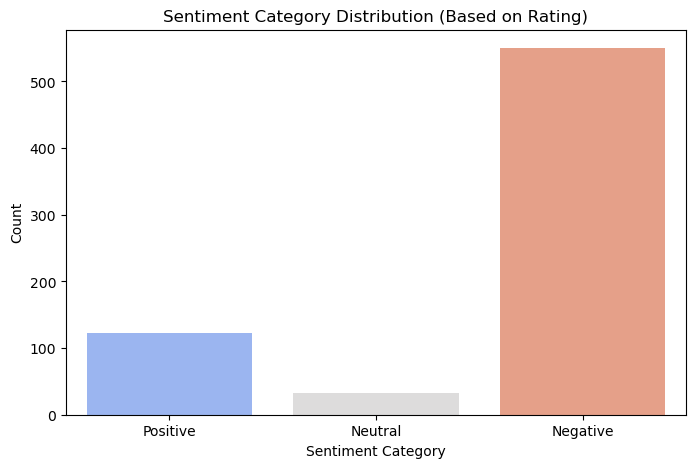

C:\Users\idehe\AppData\Local\Temp\ipykernel_13840\1986085178.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='coolwarm')


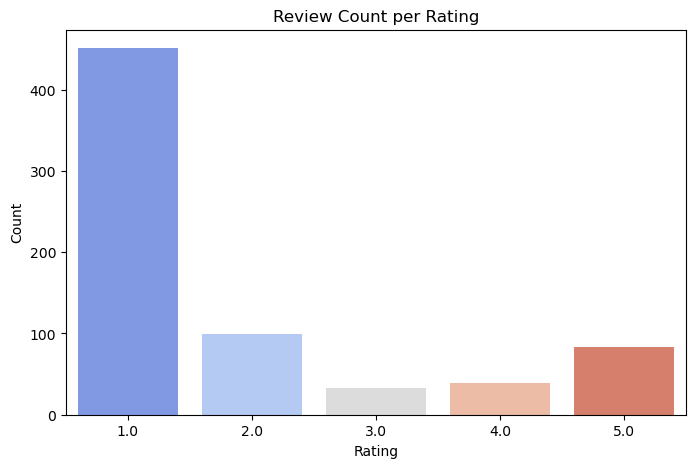

In [36]:
# Visualizing Sentiment Distribution by Rating
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=df, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Category Distribution (Based on Rating)")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

# Visualizing Review Count per Rating
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='coolwarm')
plt.title("Review Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [38]:

# Save cleaned dataset
df.to_csv("sentiment cleaned_customer_reviews.csv", index=False)